In [6]:
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [89]:
floods = pd.read_csv('../data/GlobalFloodsRecord - original.csv')

### Review of Columns
 - Register # 
     - some sort of identifier, not sure though
     - id column
 - Annual DFO #
     - some sort of identifier, not sure though
     - id column     
 - Glide # 
     - Identifier see: http://www.glidenumber.net/glide/public/about.jsp
     - id column
 - Country 
     - the country where the flood took place
     - description column
 - Other 
     - also the country where the flood took place?
     - description column     
 - Nations 
     - empty column DROP
 - Affected 
     - empty colum DROP
 - Detailed Locations (click on active links to access inundation extents) 
     - more specific locations for the floods (contains cities and some small countries).  Heterogeneous mix of political and geographical regions that don't follow a strict structure
 - Validation (post event #3503)
     - seems like source of event validation (news, etc.)
     - description column     
 - Began 
     - startdate of the event
     - description column     
 - Ended 
     - end date of the event
     - description column     
 - Duration in Days 
     - duration of the flood
     - description column     
 - Dead
     - number of people killed by the flood
     - consequence column
 - Displaced
     - number of people displaced by the event
     - consequence column
 - Damage (USD) 
     - damage done by the flood in us dollars
     - consequence column     
 - Main cause 
     - the cause of the flood
     - description column
 - Severity 
     - severity of the flood (not sure how this is calculated)
     - description column  
 - Affected sq km 
     - area affected by the flood in sq km
     - description column     
 - Magnitude (M)
     - not really sure how magnitude is determined
 - Centroid X
     - longitudinal cooridnate of the flood center
 - Centroid Y
     - latitudinal cooridnate of the flood center
 - "News" if validated
     - looks like a duplicate of validated. not really sure what this is either
     - description column          
 - M>6 
     - boolean field if the magnitude is greater than 6
     - derived column
 - Total annual floods M>6
     - looks like count of floods with magnitude greather than 6 per annum up to that date?
     - derived column     
 - M>4
     - boolean field if the magnitude is greater than 4
     - derived column     
 - Total annual floods M>4 
     - looks like count of floods with magnitude greater than 4 per annum up to that date.
     - derived column     
 - Date Began
     - Look like another start date for the event. 
 - Total floods M>6
     - ?
     - derived column     
 - Notes and Comments (may include quoted headlines from copyrighted news stories; for internal research purposes only)
     - Notes and comments about the event
 - Unnamed: 30 DROP THE FOLLOWING COLS
 - Unnamed: 31
 - Unnamed: 32
 - Unnamed: 33
 - Unnamed: 34
 - Unnamed: 35
 
There are three types of columns in the dataset: identifier columns, which have ids to used by different sytstems, 
     

## Cleaning

In [90]:
# Drop Empty columns
floods.drop([
    'Nations', ' Affected', 'Unnamed: 30', 
    'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
    'Unnamed: 34', 'Unnamed: 35'
], axis=1, inplace=True)

In [91]:
# Replace the column names with more analysis-friendly ones
new_cols = [
    'register_no', 'annual_dfo_no', 'glide_no', 
    'country', 'other', 'detailed_locations', 
    'validation', 'began', 'ended', 'duration_in_days',
    'dead', 'displaced', 'damage_usd', 'main_cause',
    'severity', 'affected_sq_km', 'magnitude',
    'centroid_x', 'centroid_y', 'news_if_validated',
    'mgt6', 'total_annual_floods_mgt6', 'mgt4',
    'total_annual_floods_mgt4', 'date_began',
    'total_floods_mgt6', 'total_floods_mgt4', 'notes'
]
floods.columns = new_cols

In [160]:
# replace 0 in 'other' column with None
floods.other.replace('0', np.nan, inplace=True)

In [164]:
# replace 0 in validation with None and lowercase 'News'
floods.validation.replace('0', np.nan, inplace=True)

In [94]:
# convert dates to datetimes
floods['began'] = floods.began.apply(pd.to_datetime)
floods['ended'] = floods.ended.apply(pd.to_datetime)

In [96]:
# convert damage to ints
floods['damage_usd'] = floods.damage_usd.apply(lambda s: re.sub(r'[^0-9]', '', str(s)) if s else np.nan)
floods['damage_usd'] = floods.damage_usd.replace('', np.nan).astype(float)

In [101]:
# replace zeros/nans with empty stirng and lowercase
floods['main_cause'] = floods.main_cause.fillna('').apply(lambda s: s.lower())
# this could use additional cleaning.

In [122]:
# lowercase news_if)validated and replace zeros

In [138]:
floods['date_began'] = floods.date_began.apply(pd.to_datetime)

In [ ]:
# Additional checks:
# - make sure centroids call in countries 

In [167]:
# Make sure there are no other empty rows or columns
assert floods[floods.isnull().all(axis=1)].shape[0] == 0
assert True not in floods.isnull().all(axis=0)

In [169]:
# create the clean dataset
floods.to_csv('../data/global_floods_records_clean.csv', index=False, ecoding='utf-8')

## Basic EDA

Notes:
 - It might be nice to add a continent or region feature so that we can facet by that
 - There are some seriously outlying floods.

In [77]:
data = pd.read_csv('../Data/cleanGlobalFloodData.csv')
data['dateBegan'] = data.dateBegan.apply(pd.to_datetime)
data['dateEnded'] = data.dateEnded.apply(pd.to_datetime)

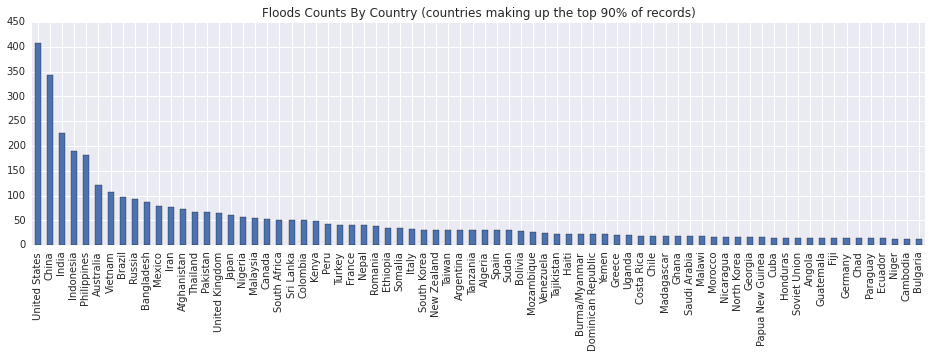

In [55]:
country_counts = data.country1.value_counts()
country_counts[
    country_counts.cumsum() < 
    (.9 * country_counts.sum())
].plot(kind='bar', figsize=(16,4)).set_title('Floods Counts By Country (countries making up the top 90% of records)');

# obs: I assume the us's place at the top is due to sampling issues rather than real flood incidences 

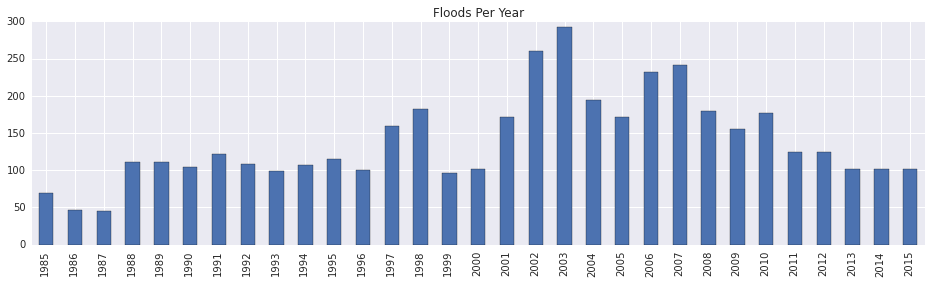

In [71]:
flood_counts_by_year = data.dateBegan.apply(pd.to_datetime).apply(lambda d: d.year).value_counts()
flood_counts_by_year.sort_index().plot(kind='bar', figsize=(16, 4)).set_title('Floods Per Year');
# obs: Curious about what's driving the spike in 2000s.  Might be interesting to check out the pressure data to see how
# it varies over that time period

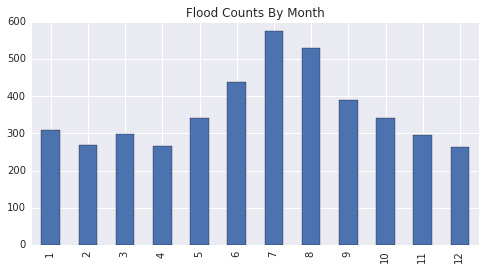

In [78]:
flood_counts_by_month = data.dateBegan.apply(pd.to_datetime).apply(lambda d: d.month).value_counts()
flood_counts_by_month.sort_index().plot(kind='bar', figsize=(8, 4)).set_title('Flood Counts By Month');
# obs: makes sense but flood rates also peak in summer.  Again, could be worth plotting this against pressure rates

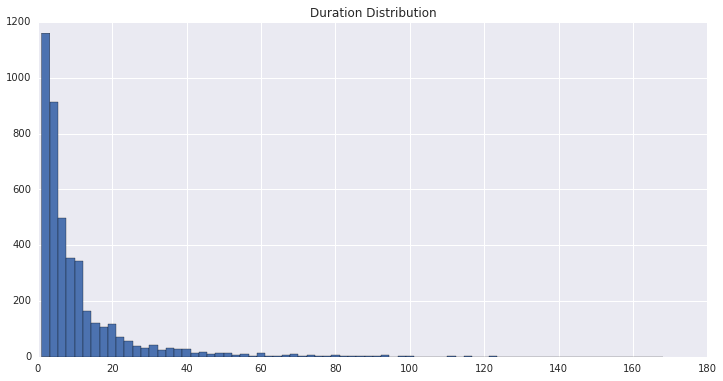

In [83]:
data[data.durationDays<200].durationDays.hist(bins=75, figsize=(12,6)).set_title('Duration Distribution');
# obs: duration seems to be pretty normally distributed with a long tail.  could be intetersting to try to subset
# the outliers and see what they have in common (geography, pressure patterns, etc.)

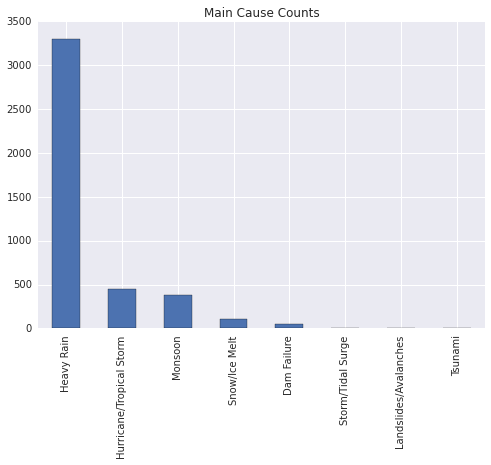

In [125]:
data.mainCause1.value_counts().plot(kind='bar').set_title('Main Cause Counts');
# obs: 'Heavy Rain' the predominant cause.  Pretty vague category though.  Could be interesting to see what 
# pressure levels near the centroids correspond to these events.

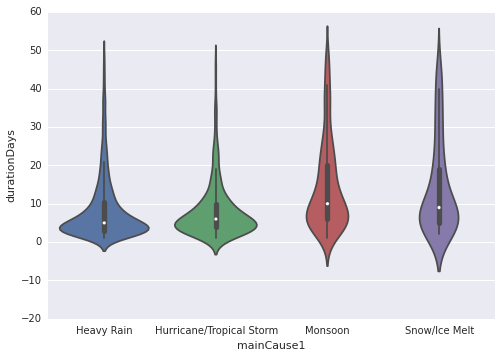

In [108]:
sns.set()
causes = ['Heavy Rain', 'Hurricane/Tropical Storm', 'Monsoon', 'Snow/Ice Melt']
sns.violinplot(x='mainCause1', y='durationDays', 
               data=data[data.mainCause1.isin(causes) & (data.durationDays<50)], size=8)
plt.figure(figsize=(8, 6));

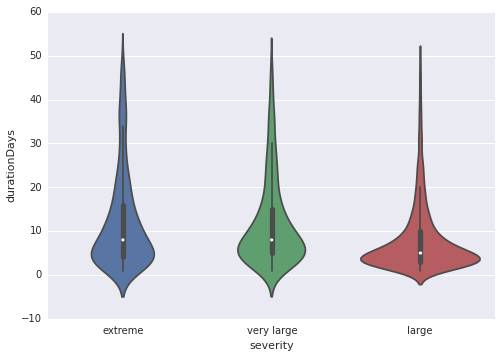

In [113]:
# Severity vs duration
sns.set();
sns.violinplot(x='severity', y='durationDays', 
               data=data[data.durationDays<50], size=8);
plt.figure(figsize=(8, 6));

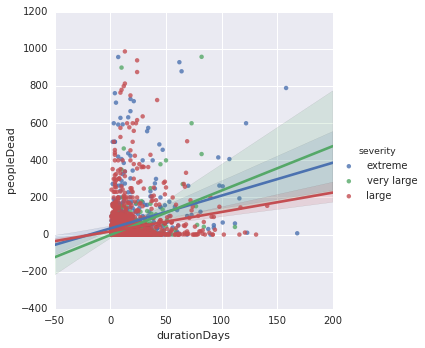

In [115]:
sns.lmplot(x='durationDays', y='peopleDead', 
           data=data[(data.peopleDead<1000) 
                     & (data.durationDays<200)], 
           hue='severity');

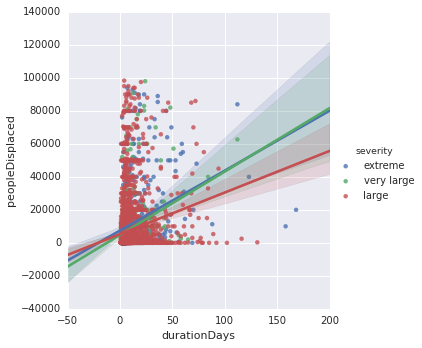

In [117]:
# Duration vs displacement
sns.lmplot(x='durationDays', y='peopleDisplaced', 
           data=data[(data.peopleDisplaced<100000) 
                     & (data.durationDays<200)], 
           hue='severity');

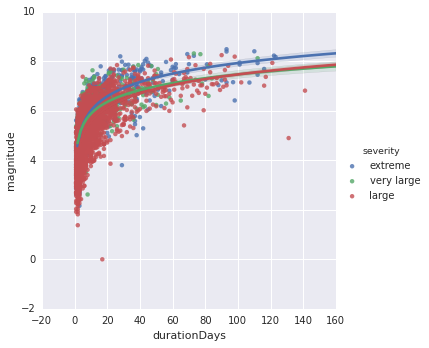

In [141]:
sns.lmplot(x='durationDays', y='magnitude', 
           data=data[(data.magnitude<10) 
                     & (data.durationDays<150)], 
           hue='severity', logx=True);

In [ ]:
sns.lmplot(x='peopleDead', y='magnitude', 
           data=data[(data.magnitude<10) 
                     & (data.durationDays<150)], 
           hue='severity', logx=True);

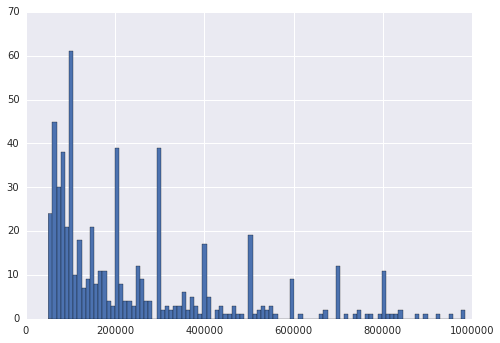

In [124]:
data[(50000<data.peopleDisplaced) & (data.peopleDisplaced<1000000)].peopleDisplaced.hist(bins=100)
# obs: spikes at the even 100,000s indicate that these numbers are estimates. unclear how accurate they are or 
# where they come from

In [ ]:
# MDS on the floods 

# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

In [126]:
data.head()

,registerNum,country1,country2,dateBegan,dateEnded,durationDays,peopleDead,peopleDisplaced,damageUsd,mainCause1,mainCause2,mainCause3,severity,affectedSqKm,magnitude,centroidX,centroidY
0,4319,United Kingdom,Ireland,2015-12-05,2016-01-06,33,3,64000,NaN,Heavy Rain,NaN,NaN,extreme,36750.19,6.384804,-2.77486,54.98680
1,4318,Philippines,NaN,2015-12-12,2016-01-06,26,40,20000,NaN,Hurricane/Tropical Storm,NaN,NaN,very large,6147.67,5.379775,121.22900,12.83570
2,4317,Kenya,NaN,2015-12-01,2016-01-06,37,112,100000,NaN,Heavy Rain,NaN,NaN,very large,103769.52,6.760363,39.51330,-2.03643
3,4316,Australia,NaN,2015-12-23,2016-01-06,15,0,0,NaN,Heavy Rain,NaN,NaN,large,66654.94,5.999924,152.12100,-30.35710
4,4315,Paraguay,Uruguay,2015-12-01,2016-01-06,37,12,170000,NaN,Heavy Rain,NaN,NaN,extreme,574056.99,7.628187,-55.84820,-26.03690


In [ ]:
X - X.mean()